<a href="https://colab.research.google.com/github/Quiinterito/redtransportemasivo/blob/main/Copia_de_Untitled0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import networkx as nx
from collections import Counter
import matplotlib.pyplot as plt
from tabulate import tabulate

In [2]:
df=pd.read_csv("redtransmilenio.csv")
df.head()

,origen,destino,longitud de interaccion
0,Portal Tunal,Portal Suba,0
1,Parque,Portal Suba,1293
2,Calle 40 Sur,Portal Suba,3454
3,Olaya,Portal Suba,4918
4,Tercer Milenio,Portal Suba,8415


In [3]:
Trasnmilenio = nx.DiGraph()
Trasnmilenio = nx.from_pandas_edgelist(df,source = "origen",target = "destino", edge_attr = "longitud de interaccion")



In [4]:
Trasnmilenio.nodes()

NodeView(('Portal Tunal', 'Portal Suba', 'Parque', 'Calle 40 Sur', 'Olaya', 'Tercer Milenio', 'Jimenez', 'Calle 19', 'Calle 22', 'Calle 45', 'Marly', 'Calle 76', 'Escuela Militar', 'Rionegro', 'Puentelargo', 'Humedal Cordoba', 'Niza Calle 127', 'Gratamira', 'Portal Sur', 'Flores', 'Perdomo', 'Madelena', 'Venecia', 'Alqueria', 'General Santander', 'NQS Calle 30 Sur', 'Santa Isabel', 'Toberin', 'Calle 72', 'Calle 146', 'Calle 142', 'Calle 127', 'Portal 80', 'Portal Norte', 'Carrera 90', 'Avenida Cali', 'Granja - Carrera 77', 'Avenida 68', 'Carrera 53', 'Carrera 47', 'Calle 85', 'Virrey', 'Calle 100', 'Calle 106', 'Pepe Sierra', 'Alcala', 'Avenida  Cali', 'Comuneros', 'Ricaurte', 'Avenida El Dorado', 'Universidad Nacional', 'Simon Bolivar', 'Calle 75', 'Castellana', 'Prado', 'Biblioteca', 'Quiroga', 'Restrepo', 'Hortua', 'Avenida 39'))

In [5]:
pos = nx.spring_layout(Trasnmilenio)

{'Portal Tunal': Text(-0.605391609495518, 0.20921095240187446, 'Portal Tunal'),
 'Portal Suba': Text(-0.7050658054826704, 0.22322644551484133, 'Portal Suba'),
 'Parque': Text(-0.788255815841941, 0.5335547365952811, 'Parque'),
 'Calle 40 Sur': Text(-0.9809810107882706, 0.34708701819118654, 'Calle 40 Sur'),
 'Olaya': Text(-0.9278670756185232, 0.26489923064310555, 'Olaya'),
 'Tercer Milenio': Text(-0.2850173681251162, 0.2068072207704924, 'Tercer Milenio'),
 'Jimenez': Text(-0.8321456334077747, 0.4447787285133285, 'Jimenez'),
 'Calle 19': Text(-0.79262637807234, -0.008760030427178754, 'Calle 19'),
 'Calle 22': Text(-0.30037587530018733, 0.12705536001057316, 'Calle 22'),
 'Calle 45': Text(-0.7145634422613606, 0.44654140327494174, 'Calle 45'),
 'Marly': Text(-0.9675658192927082, 0.10303347066495006, 'Marly'),
 'Calle 76': Text(-0.3015387192304084, -0.19040086941623607, 'Calle 76'),
 'Escuela Militar': Text(-0.925079650868396, 0.443686413706916, 'Escuela Militar'),
 'Rionegro': Text(-0.641670

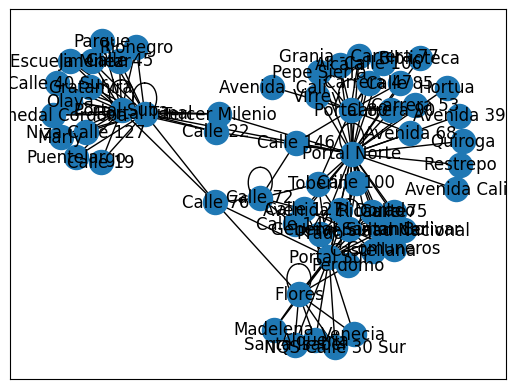

In [6]:
nx.draw_networkx_nodes(Trasnmilenio,pos)
nx.draw_networkx_edges(Trasnmilenio,pos)
nx.draw_networkx_labels(Trasnmilenio,pos)

In [7]:
Trasnmilenio.order()

60

In [8]:
### Estaciones que pertenecen a más de una línea
for x in Trasnmilenio.nodes():
    if Trasnmilenio.degree(x) > 4:
        print(x)

Portal Tunal
Portal Suba
Calle 76
Portal Sur
Flores
General Santander
Toberin
Calle 72
Portal 80
Portal Norte


In [9]:
djk_path= nx.dijkstra_path(Trasnmilenio, source='Portal 80', target='Portal Tunal', weight=True)
djk_path


['Portal 80', 'Portal Norte', 'Portal Tunal']

In [10]:
len(djk_path)

3

In [11]:
nx.dijkstra_path_length(Trasnmilenio, 'Portal 80', 'Portal Tunal', 'Longitud de interestación')


2

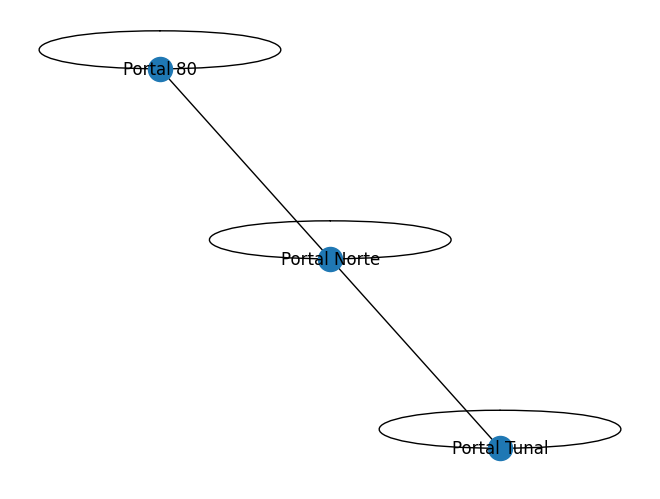

In [12]:
Ruta_1 = Trasnmilenio.subgraph(['Portal 80', 'Portal Norte', 'Portal Tunal'])
nx.draw(Ruta_1,with_labels = True)


In [13]:
nx.write_gexf(Trasnmilenio,"transmilenio.gexf", version = "1.2draft")